In [9]:
#Importing Libraries
import random
import math
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import PIL
from PIL import Image
import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Dropout, ZeroPadding2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
import tqdm
import warnings
warnings.filterwarnings("ignore")
#Settings
sns.set(rc={"axes.facecolor":"#EDE9DE","figure.facecolor":"#D8CA7E"})

ModuleNotFoundError: No module named 'tqdm'

In [2]:


#Importing data
data_path = "C:\\Green_Energy_react\\env\\backend\\portraits\\"
batch_s = 64
#Import as tf.Dataset
data = tf.keras.preprocessing.image_dataset_from_directory(data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)

NameError: name 'tf' is not defined

In [10]:
print(df_labels.shape)
print(df_labels.columns)

(10000, 2)
Index(['id', 'label'], dtype='object')


In [11]:
print(df_samples.shape)
print(df_samples.columns)

(10000, 2)
Index(['id', 'label'], dtype='object')


In [12]:
train = "C:\\Green_Energy_react\\env\\backend\\train"
test = "C:\\Green_Energy_react\\env\\backend\\test"

print("Number of training images: {}".format(len(os.listdir(train))))
print("Number of test images: {}".format(len(os.listdir(test))))

Number of training images: 52006
Number of test images: 3381


In [13]:
img_train = os.listdir(train)
img_test = os.listdir(test)

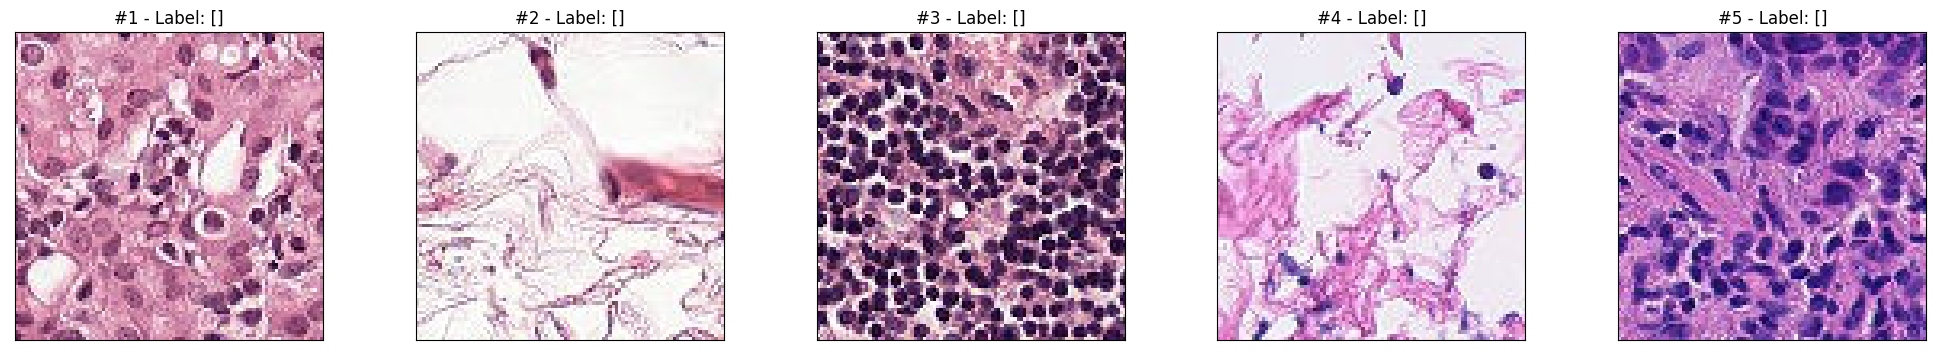

In [20]:
fig = plt.figure(figsize=(25, 4))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    
    im = Image.open(train +"\\"+ img_train[i])
    plt.imshow(im)
    label = df_labels.loc[df_labels['id'] == img_train[i].split('.')[0], 'label'].values
    ax.set_title(f'#{i+1} - Label: {label}')

In [28]:
missing_values = df_labels.isnull().sum()
missing_values

id       0
label    0
dtype: int64

In [29]:
missing_values = df_samples.isnull().sum()
missing_values

id       0
label    0
dtype: int64

In [30]:
df_labels[df_labels.duplicated(keep=False)]

,id,label


In [31]:
df_labels['label'].value_counts()


0    6020
1    3980
Name: label, dtype: int64

In [32]:
df_samples['label'].value_counts()

0    10000
Name: label, dtype: int64

<AxesSubplot: >

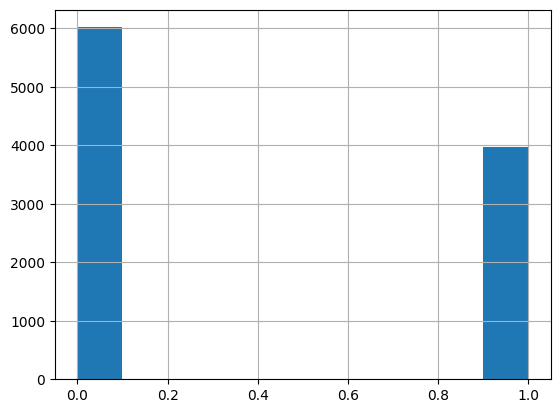

In [33]:
malignant = df_labels.loc[df_labels['label']==1]['id'].values    
normal = df_labels.loc[df_labels['label']==0]['id'].values      
df_labels['label'].hist()

In [43]:
def plot_fig(ids,title,nrows=3,ncols=2):

    fig,ax = plt.subplots(nrows,ncols,figsize=(7,7))
    plt.subplots_adjust(wspace=0, hspace=0) 
    for i,j in enumerate(ids[:nrows*ncols]):
        fname = os.path.join(train ,j +'.tif')
        if(os.path.exists(fname)):
            img = Image.open(fname)
            idcol = ImageDraw.Draw(img)
            idcol.rectangle(((0,0),(95,95)),outline='white')
            plt.subplot(nrows, ncols, i+1) 
            plt.imshow(np.array(img))
            plt.axis('off')

    plt.suptitle(title, y=0.94)

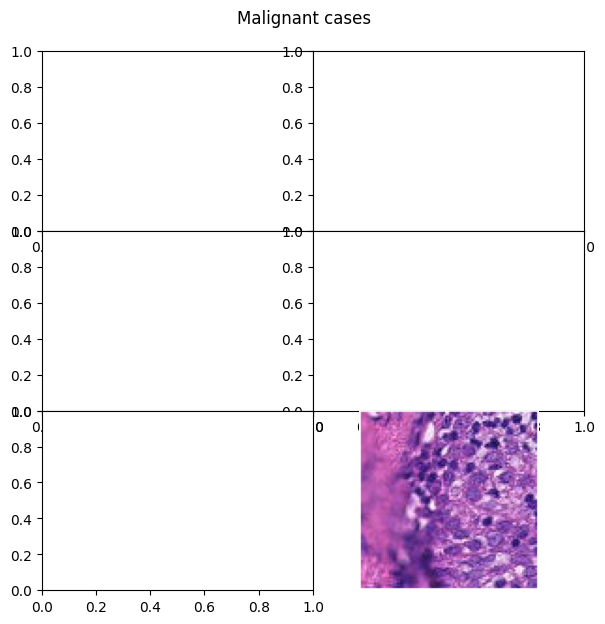

In [44]:
plot_fig(malignant,'Malignant cases')

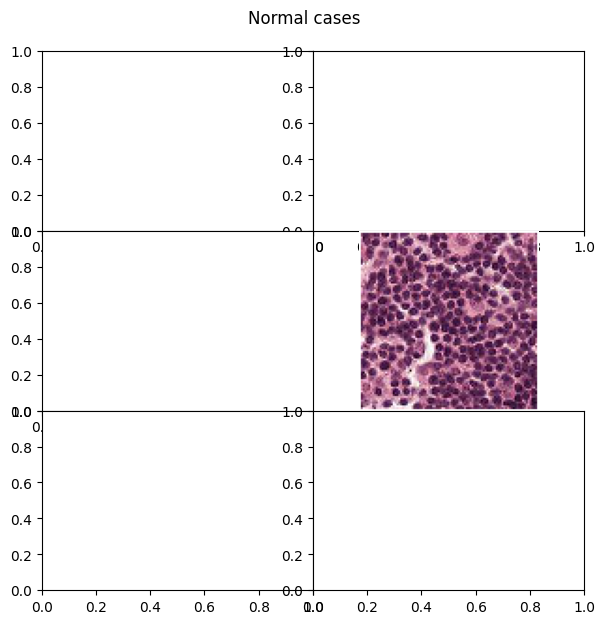

In [45]:
plot_fig(normal,'Normal cases')

In [46]:
train_data, val_data = train_test_split(df_labels, test_size=0.2, random_state=42, stratify=df_labels['label'])

In [47]:
train_data = train_data.astype(str)
val_data = val_data.astype(str)
print(train_data.shape,val_data.shape)

(8000, 2) (2000, 2)


In [48]:
train_data = train_data.head(len(train_data) )

# Remove half of the samples from val_data
val_data = val_data.head(len(val_data) )

print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)

Training data shape: (8000, 2)
Validation data shape: (2000, 2)


In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [50]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data['id'] += '.tif'
val_data['id'] += '.tif'

In [51]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory = train,
    x_col = 'id',
    y_col = 'label',
    target_size=(96,96),
    batch_size=32,
    class_mode='binary'
)
train_generator_enc = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory = train,
    x_col = 'id',
    y_col = 'label',
    target_size=(96,96),
    batch_size=32,
    class_mode='input'
)

Found 1913 validated image filenames belonging to 2 classes.


C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 6087 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Found 1913 validated image filenames.


C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 6087 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [52]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory = train,
    x_col='id',
    y_col='label',
    target_size=(96,96),
    batch_size=32,
    class_mode='binary'
)
val_generator_enc = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory = train,
    x_col='id',
    y_col='label',
    target_size=(96,96),
    batch_size=32,
    class_mode='input'
)

Found 507 validated image filenames belonging to 2 classes.
Found 507 validated image filenames.


C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1493 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(
C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1493 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [53]:
test_data = df_samples.astype(str)
test_data = test_data[:1000]
test_data['id'] += '.tif'

In [54]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory = test,
    x_col='id',
    y_col='label',
    target_size=(96,96),
    batch_size=32,
)

Found 71 validated image filenames belonging to 1 classes.


C:\Users\PRIOTOSH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 929 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Step 1: Build and Train Autoencoder Models
input_shape = (96, 96, 3)

# Define the AE architecture
def create_autoencoder(input_shape):
    # Encoder
    encoder_inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(encoder_inputs)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
    x = Flatten()(x)
    encoded = Dense(128, activation='relu')(x)
    
    # Decoder
    x = Dense(24*24*64, activation='relu')(encoded)  # Adjusted size for 96x96px images
    x = Reshape((24, 24, 64))(x)
    x = Conv2DTranspose(64, kernel_size=3, activation='relu', strides=2, padding='same')(x)
    x = Conv2DTranspose(32, kernel_size=3, activation='relu', strides=2, padding='same')(x)
    decoded = Conv2DTranspose(3, kernel_size=3, activation='sigmoid', padding='same')(x)  # Adjusted for color images
    
    autoencoder = Model(encoder_inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

# Train AE model
input_shape = (96, 96, 3)
ae_model = create_autoencoder(input_shape)
train_steps_per_epoch = len(train_data) 
val_steps_per_epoch = len(val_data) 
print("==============fitting Auto encoder model =================")
ae_model.fit(
    train_generator_enc,
    steps_per_epoch=100,
    epochs=3,
    validation_data=val_generator_enc,
    validation_steps=val_steps_per_epoch
)
# Step 2: Generate Compressed Images
print("============== Image Compressing =================")
# Obtain compressed representations from AE model
compressed_train = ae_model.predict(train_generator)
compressed_test = ae_model.predict(test_generator)
compressed_val = ae_model.predict(val_generator)

# Step 3: Train CNN Models for Image Classification

# Define CNN architecture
def create_cnn_classifier(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

==============fitting Auto encoder model =================
Epoch 1/3
100/100 [==============================] - 52s 502ms/step - loss: 0.6156 - val_loss: 0.5973
============== Image Compressing =================
16/16 [==============================] - 4s 220ms/step


In [ ]:
# Train CNN model on AE compressed images
train_labels = train_data['label'].astype(int)
test_labels = test_data['label'].astype(int)
val_labels = val_data['label'].astype(int)
cnn_model_ae = create_cnn_classifier(compressed_train.shape[1:])
print("============== fitting Auto encoder model with compressed Image =================")
history = cnn_model_ae.fit(compressed_train,train_labels,
    steps_per_epoch=100,
    epochs=10,
    validation_data=(compressed_test,test_labels),
    validation_steps=val_steps_per_epoch)

# Train CNN model on original images

print("============== fitting Auto encoder model with origional Image =================")
cnn_model_orig = create_cnn_classifier(input_shape)
cnn_model_orig.fit( train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=test_generator,
    validation_steps=val_steps_per_epoch)

In [ ]:
#CNN model comparasion
from sklearn.metrics import accuracy_score

testData1 = val_data['label'].astype(int)

def getAccuracy(model):
    data = model.predict(val_generator)
    data = np.round(data.flatten()).astype('int')
    data = data[:2000]
    score = accuracy_score(data,testData1)
    return score
    
    
accuracy_orig = getAccuracy(cnn_model_orig)
loss_ae, accuracy_ae = cnn_model_ae.evaluate(compressed_val, testData1)

print("Accuracy of CNN model trained on AE compressed images:", accuracy_ae)
print("Accuracy of CNN model trained on original images:", accuracy_orig)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as K

# Step 1: Build and Train VAE Models

# Define the VAE architecture
def create_vae(input_shape, latent_dim):
    # Encoder
    encoder_inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, activation='relu', strides=2, padding='same')(encoder_inputs)
    x = Conv2D(64, kernel_size=3, activation='relu', strides=2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(16, activation='relu')(x)
    z_mean = Dense(latent_dim, name="z_mean")(x)
    z_log_var = Dense(latent_dim, name="z_log_var")(x)
    
    # Sampling
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim), mean=0., stddev=1.)
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    # Specify the output shape of the sampling function
    output_shape = (latent_dim,)

    # Create the Lambda layer with specified output shape
    z = Lambda(sampling, output_shape=output_shape)([z_mean, z_log_var])
    
    encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = Dense(7 * 7 * 64, activation='relu')(latent_inputs)
    x = Reshape((7, 7, 64))(x)
    x = Conv2DTranspose(64, kernel_size=3, activation='relu', strides=2, padding='same')(x)
    x = Conv2DTranspose(32, kernel_size=3, activation='relu', strides=2, padding='same')(x)
    decoder_outputs = Conv2DTranspose(1, kernel_size=3, activation='sigmoid', padding='same')(x)
    
    decoder = Model(latent_inputs, decoder_outputs, name="decoder")

    # VAE
    vae_outputs = decoder(z)
    vae = Model(encoder_inputs, vae_outputs, name="vae")

    return vae

# Example usage:
input_shape = (96, 96, 3)
latent_dim = 2
vae_model = create_vae(input_shape, latent_dim)
vae_model.compile(optimizer='adam', loss='mse')  # Use mean squared error for image reconstruction
vae_model.summary()


vae_model.fit(train_generator,
              steps_per_epoch=100,
              epochs=10,
              validation_data=val_generator,
              validation_steps=val_steps_per_epoch)

# Step 2: Generate Compressed Images from VAE

# Obtain compressed representations from VAE encoder
compressed_train_vae = vae_model.predict(train_generator)
compressed_test_vae = vae_model.predict(test_generator)
compressed_val_vae = vae_model.predict(val_generator)

# Train CNN model on VAE compressed images
train_labels = train_data['label'].astype(int)
test_labels = test_data['label'].astype(int)

cnn_model_vae = create_cnn_classifier(compressed_train_vae.shape[1:])
cnn_model_vae.fit(compressed_train_vae, train_labels,
                  steps_per_epoch=100,
                  epochs=10,
                  validation_data=(compressed_test_vae, test_labels),
                  validation_steps=val_steps_per_epoch)

In [ ]:
import pandas as pd
val_labels = val_data['label'].astype(int)
testData1 = val_data['label'].astype(int)

def getAccuracyVAE(model):
    data = model.predict(compressed_val_vae)
    data = np.round(data.flatten()).astype('int')
    data = data[:2000]
    score = accuracy_score(data,val_labels)
    return score


def getAccuracy(model):
    data = model.predict(val_generator)
    data = np.round(data.flatten()).astype('int')
    data = data[:2000]
    score = accuracy_score(data,val_labels)
    return score
    

# Calculate accuracy scores
accuracy_orig = getAccuracy(cnn_model_orig)
loss_ae, accuracy_ae = cnn_model_ae.evaluate(compressed_val, val_labels)
predictions = getAccuracyVAE(cnn_model_vae)

# Store the accuracy scores in a DataFrame
data = {
    'Model': ['Original CNN', 'AE Compressed CNN', 'VAE Compressed CNN'],
    'Accuracy': [accuracy_orig, accuracy_ae, predictions]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

In [ ]:
import matplotlib.pyplot as plt

# Define optimizers to compare
optimizers = ['adam', 'rmsprop', 'sgd']

# Define lists to store training and validation metrics for each optimizer
train_losses = []
val_losses = []

# Loop through each optimizer
for optimizer in optimizers:
    # Create a new instance of the VAE model
    cnn_model_vae = create_cnn_classifier(compressed_train_vae.shape[1:])
    
    # Compile the model with the current optimizer
    cnn_model_vae.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = cnn_model_vae.fit(compressed_train_vae, train_labels,
                                 steps_per_epoch=100,
                                 epochs=10,
                                 validation_data=(compressed_test_vae, test_labels),
                                 validation_steps=val_steps_per_epoch,
                                 verbose=0)  # Set verbose to 0 to suppress training output
    
    # Append training and validation loss to the respective lists
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# Plot training and validation loss for each optimizer
plt.figure(figsize=(10, 6))
for i, optimizer in enumerate(optimizers):
    plt.plot(train_losses[i], label=f'{optimizer}_train')
    plt.plot(val_losses[i], label=f'{optimizer}_val')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras import regularizers

# Define your CNN model with regularization
def create_cnn_classifier(input_shape, dropout_rate=None, weight_decay=None):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    if weight_decay:
        x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))(x)
    else:
        x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create CNN model without regularization
cnn_model_no_reg = create_cnn_classifier(input_shape)

# Train the model without regularization
history_no_reg = cnn_model_no_reg.fit(train_generator,
                                      steps_per_epoch=100,
                                      epochs=10,
                                      validation_data=(test_generator),
                                      validation_steps=val_steps_per_epoch,
                                      verbose=0)

# Create CNN model with regularization (dropout and weight decay)
cnn_model_with_reg = create_cnn_classifier(input_shape, dropout_rate=0.5, weight_decay=1e-4)

# Define early stopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with regularization
history_with_reg = cnn_model_with_reg.fit(train_generator,
                                          steps_per_epoch=100,
                                          epochs=10,
                                          validation_data=test_generator,
                                          validation_steps=val_steps_per_epoch,
                                          callbacks=[early_stopping],
                                          verbose=0)

# Plot training and validation loss for both scenarios
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_no_reg.history['loss'], label='Train (No Reg)')
plt.plot(history_no_reg.history['val_loss'], label='Val (No Reg)')
plt.plot(history_with_reg.history['loss'], label='Train (With Reg)')
plt.plot(history_with_reg.history['val_loss'], label='Val (With Reg)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_no_reg.history['accuracy'], label='Train (No Reg)')
plt.plot(history_no_reg.history['val_accuracy'], label='Val (No Reg)')
plt.plot(history_with_reg.history['accuracy'], label='Train (With Reg)')
plt.plot(history_with_reg.history['val_accuracy'], label='Val (With Reg)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
